In [130]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import FastICA
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import pickle
import cv2
import tensorflow as tf
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import load_model
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
np.set_printoptions(precision = 3, suppress = True)
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC as svc
from sklearn import tree
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from sklearn import decomposition
from random import randint
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import balanced_accuracy_score
#from tensorflow.keras import  layers
#from tensorflow.keras.layers.experimental import preprocessing

##### Machine learning models which require normalization

In [158]:
def Logistic_Regression(data_list, y_train, X_test, y_test):
    d = data_list
    y = y_train
    # Random Search Classification for best hyperparameter
    model = LogisticRegression()
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    space = dict()
    space['solver'] = ['newton-cg','lbfgs','liblinear']
    space['penalty'] = ['none','l1','l2','elasticnet']
    space['C'] = loguniform(1e-5, 100)
    search = RandomizedSearchCV(model, space, n_iter = 500, scoring = 'accuracy',n_jobs = -1, cv = cv, random_state =1)
    
    ran_grid_logsearch = []
    
    for i in range(len(data_list)):
        result = search.fit(data_list[i],y_train)
        sc = result.best_score_
        pre = result.predict(X_test)
        acc = metrics.accuracy_score(y_test, pre)
        score = "Ran_log_score:"+(str)(i)+ (str)(sc)
        ran_grid_logsearch.append(score)
        accur = "accuracy is:"+ (str)(acc)
        #ran_search.append(accur)
    
        
    # Grid Search Classification for best hyperparameter
    grid_space = dict()
    grid_space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
    grid_space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
    grid_space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
  
    grid_search = GridSearchCV(model, grid_space, scoring='accuracy', n_jobs = -1, cv =cv)
    for j in range(len(data_list)):
        res = grid_search.fit(data_list[j],y_train)
        sc_1 = res.best_score_
        gp = res.predict(X_test)
        acc_1 = metrics.accuracy_score(y_test, gp)
        score_1 = "Grid_log_score:"+(str)(j)+(str)(sc_1)
        ran_grid_logsearch.append(score_1)
        accur_1 = "accuracy is:"+ (str)(acc_1)
        #grid_sea.append(accur_1)
        
    return ran_grid_logsearch

In [106]:
def K_Neighbour_Classifier(data_list, y_train, X_test, y_test):
    d = data_list
    y = y_train
    
    # grid search
    model = KNeighborsClassifier()
    k_range = list(range(1,31))
    param_grid = dict(n_neighbors = k_range)
    
    ran_grid_knnsearch = []
    # Grid Search classification for best hyperparameter
    grid_knn = GridSearchCV(model, param_grid, cv =10, scoring ='accuracy', n_jobs = -1)
    for i in range(len(data_list)):
        grid_search = grid_knn.fit(data_list[i], y_train)
        sc_knn = grid_search.best_score_
        pre_knn = grid_search.predict(X_test)
        acc_knn = metrics.accuracy_score(y_test, pre_knn)
        score_knn = "grid_knn_score:" +(str)(i)+ (str)(sc_knn)
        ran_grid_knnsearch.append(score_knn)
        
    # random search
    n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 100, num = 50)]   
    weights = ['uniform','distance']
    metric = ['euclidean','manhattan','chebyshev','minkowski'] 
    random_grid = {
        'n_neighbors': n_neighbors,
        'weights': weights,
        'metric': metric,}
    knn_random = RandomizedSearchCV(model,
                                    random_state = 42,
                                    n_jobs = -1,
                                    param_distributions = random_grid,
                                    cv=3,
                                    verbose = 2)
    for j in range(len(data_list)):
        k_s = knn_random.fit(data_list[i], y_train)
        knn_sc = k_s.best_score_
        knn_pre = k_s.predict(X_test)
        knn_acc = metrics.accuracy_score(y_test, knn_pre)
        knn_score = "ran_knn_score"+(str)(j)+ (str)(knn_sc)
        ran_grid_knnsearch.append(knn_score)
    return ran_grid_knnsearch


In [104]:
def Linear_SVC(data_list, y_train, X_test, y_test):
    d = data_list
    y = y_train
    
    #grid search
    param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
    svc_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose =3, scoring ='accuracy')
    
    ran_grid_svmsearch = []
    for i in range(len(data_list)):
        svc_grid = svc_grid.fit(data_list[i], y_train)
        svc_sc = svc_grid.best_score_
        svc_pre = svc_grid.predict(X_test)
        svc_acc = metrics.accuracy_score(y_test, svc_pre)
        svc_score = "grid_svc_score"+(str)(i)+(str)(svc_sc)
        ran_grid_svmsearch.append(svc_score)
        
    # random search
    rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}


    # run randomized search
    ran_svm = RandomizedSearchCV(SVC(),param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = 'accuracy')
    for j in range(len(data_list)):
        svm_grid = ran_svm.fit(data_list[i], y_train)
        svm_sc = svm_grid.best_score_
        svm_pre = svm_grid.predict(X_test)
        svm_acc = metrics.accuracy_score(y_test, svm_pre)
        svm_score = "ran_svm_score"+(str)(j)+(str)(svm_sc)
        ran_grid_svmsearch.append(svm_sc)
    return ran_grid_svmsearch

##### Machine Learning model which doesnt require normalization 

In [141]:
def DecisionTree(num_imputed_mean, num_imputed_median,y_train, X_test, y_test):
    d = data_list
    y = y_train
    
    ran_grid_dt = []
    model = DecisionTreeClassifier()
    pca = decomposition.PCA()
    std_slc = StandardScaler()
    dec_tree = tree.DecisionTreeClassifier()
    #grid_search
    pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
    
    n_components = list(range(1,X.shape[1]+1,1))
    criterion = ['gini', 'entropy']
    max_depth = [2,4,6,8,10,12]
    parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
    dt_grid = GridSearchCV(pipe, parameters)
    for i in range(len(data_list)):
        dt = dt_grid.fit(data_list[i], y_train)
        dt_sc = dt_grid.best_score_
        score_dt = "grid_dt_score"+(str)(i)+(str)(dt_sc)
        ran_grid_dt.append(score_dt)
    
    # random_search
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tree_cv =RandomizedSearchCV(dec_tree, param_dist, cv =5)
    for j in range(len(data_list)):
        t = tree_cv.fit(data_list[j], y_train)
        t_sc = t.best_score_
        score_dt = "ran_dt_score"+(str)(j)+(str)(t_sc)
        ran_grid_dt.append(score_dt)
        
    return ran_grid_dt

In [155]:
def Gradient_Boost(num_imputed_mean, num_imputed_median,y_train, X_test, y_test):
    d = data_list
    y = y_train
    
    ran_grid_gb = []
    model =  GradientBoostingClassifier()
    # grid_search
    #creating Scoring parameter: 
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score),
               'recall':make_scorer(recall_score)}

    # A sample parameter

    parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
    
    gbc = GridSearchCV(model, parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)
    
    for i in range(len(data_list)):
        gbc_g = gbc.fit(data_list[i], y_train)
        gbc_sc = gbc_g.best_score_
        score_gb = "grid_gb_score" + (str)(i) + (str)(gbc_sc)
        gbc_pre = gbc_g.predict(X_test)
        gbc_acc = metrics.accuracy_score(y_test, gbc_pre)
        ran_grid_gb.append(score_gb)
        
    # random_search
    parameters = {"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : sp_randInt(4, 10)
                 }
    randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 2, n_jobs=-1)
    for j in range(len(data_list)):
        rand_gb = randm.fit(data_list[j],y_train)
        rand_sc = rand_gb.best_score_
        rand_pre = rand_gb.predict(X_test)
        rand_acc = metrics.accuracy_score(y_test, rand_pre)
        score_gb = "ran_gb_score"+ (str)(j) + (str)(rand_sc)
        ran_grid_gb.append(score_gb)
        
    return ran_grid_gb

In [109]:
def Random_Forest(num_imputed_mean, num_imputed_median,y_train, X_test, y_test):
    d = data_list
    y = y_train
    
    ran_grid_rf = []
    model = RandomForestRegressor(random_state = 35)
    #random_search
    n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False]
    
    random_grid = {'n_estimators': n_estimators,

    'max_features': max_features,

    'max_depth': max_depth,

    'min_samples_split': min_samples_split,

    'min_samples_leaf': min_samples_leaf,

    'bootstrap': bootstrap}
    
    rf_random = RandomizedSearchCV(estimator = model,
                                   param_distributions = random_grid, 
                                   cv = 5, 
                                   verbose=2, 
                                   random_state=35, 
                                   n_jobs = -1)
    
    for i in range(len(data_list)):
        rf_ran = rf_random.fit(data_list[i],y_train)
        rf_sc = rf_ran.best_score_
        #rf_pre = rf_ran.predict(X_test)
        rf_score = "ran_rf_score"+(str)(i)+(str)(rf_sc)
        ran_grid_rf.append(rf_score)
    
    #grid_search
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    }
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
    for j in range(len(data_list)):
        grid_rf = grid_search.fit(data_list[j], y_train)
        rf_sc = grid_rf.best_score_
        #rf_pre = grid_rf.predict(X_test)
        rf_score = "grid_rf_score"+(str)(j)+(str)(rf_sc)
        ran_grid_rf.append(rf_score)
        
    return ran_grid_rf
        

## FEATURE ENGINEERING + PREPROCESSING

##### Scalers and preprocessing.

In [48]:
def Robust_Scaler(data, rs_t):
    cols = rs_t.columns
    scaler = preprocessing.RobustScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = cols)
    print("BEFORE SCALING ROBUST SCALER")
    rs_t[cols].hist(figsize=(16,10))
    print("AFTER SCALING ROBUST SCALER")
    scaled_data[cols].hist(figsize = (16,10))
    return scaled_data

In [50]:
def Standard_Scaler(data, ss_t):
    cols = ss_t.columns
    scaler = preprocessing.StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = cols)
    print("BEFORE SCALING STANDARD SCALER")
    ss_t[cols].hist(figsize=(16,10))
    print("AFTER SCALING STANDARD SCALER")
    scaled_data[cols].hist(figsize = (16,10))
    return scaled_data

In [51]:
def Min_MaxScaler(data, mm_t):
    cols = mm_t.columns
    scaler = preprocessing.MinMaxScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = cols)
    print("BEFORE SCALING MINMAX SCALER")
    mm_t[cols].hist(figsize=(16,10))
    print("AFTER SCALING MINMAX SCALER")
    scaled_data[cols].hist(figsize = (16,10))
    return scaled_data

In [41]:
# FOR NUMERICAL DATASET
def preprocessing_numerical_data(X_train,y_train):
    x_t = X_train
    y_t = y_train
    # imputing missing values using mean and median
    num_imputed_mean = x_t.apply(lambda x: x.fillna(x.mean())).copy()
    num_imputed_median = x_t .apply(lambda x: x.fillna(x.median())).copy()
    
    # scaling the dataset
    mean_median_list = [num_imputed_mean, num_imputed_median]
    numerical_scaler = [Robust_Scaler, Standard_Scaler, Min_MaxScaler]
    
    data_list = []
    for i in range(len(mean_median_list)):
        data = mean_median_list[i].copy()
        for j in range(len(numerical_scaler)):
            returned_scaler = numerical_scaler[j](data,x_t)
            data_list.append(returned_scaler)
    return data_list, num_imputed_mean, num_imputed_median

In [173]:
# FOR CATEGORICAL DATASET
def preprocessing_categorical_data(data_set):
    
    # segregating the columns with object numerical and categorical values
    if len(data_set.select_dtypes(include=['object']).get_dtype_counts()) != 0:
        obj = data_set.select_dtypes(include=['object'].copy())
        num = data_set.select_dtypes(include=['number'].copy())
        
        # checking for missing values and imputing them
        if obj.isnull().values.sum() == 0:
            obj_imputed = obj.apply(lambda x: x.fillna(x.value_counts().index[0])) 
            
            #one hot encoding
            col_name = obj_imputed.columns
            
            for i in range(0,len(col_name)):
                obj_one_hot = pd.get_dummies(obj_imputed, columns = col_name[i], prefix= col_name[i]) 
        else:
            obj_imputed = obj
            # one hot encoding
        
        if num.isnull().values.sum() != 0:
            num_imputed = num.apply(lambda x: x.fillna(x.median().index[0]))
            
            
        else:
            num_imputed = num
    

In [23]:
# Loading dataset, checking if the extension 
def load_dataset(file_name):
    ALLOWED_EXTENSTIONS = ['xls','csv','json']
    if file_name.split('.',1)[1].lower() in ALLOWED_EXTENSTIONS[0]:
        return pd.read_excel(file_name)
    elif file_name.split('.',1)[1].lower() in ALLOWED_EXTENSTIONS[1]:
        return pd.read_csv(file_name)
    elif file_name.split('.',1)[1].lower() in ALLOWED_EXTENSTIONS[2]:
        return pd.read_json(file_name)
    else:
        return "Sorry doesnt support the extension....."
    

   male  age  education  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  \
0     1   39        4.0              0     0.0                0             0   
1     0   46        2.0              0     0.0                0             0   
2     1   48        1.0              1     0.0                0             0   
3     0   61        3.0              1     0.0                0             1   
4     0   46        3.0              1     0.0                0             0   

   diabetes  totChol    BMI  heartRate  TenYearCHD  
0         0    195.0  26.97       80.0           0  
1         0    250.0  28.73       95.0           0  
2         0    245.0  25.34       75.0           0  
3         0    225.0  28.58       65.0           1  
4         0    285.0  23.10       85.0           0  
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57         

C:\Users\Praty\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib

AFTER SCALING ROBUST SCALER
BEFORE SCALING STANDARD SCALER


C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matpl

AFTER SCALING STANDARD SCALER
BEFORE SCALING MINMAX SCALER


C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matpl

AFTER SCALING MINMAX SCALER
BEFORE SCALING ROBUST SCALER


C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matpl

AFTER SCALING ROBUST SCALER
BEFORE SCALING STANDARD SCALER


C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matpl

AFTER SCALING STANDARD SCALER
BEFORE SCALING MINMAX SCALER


C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Praty\Anaconda3\lib\site-packages\pandas\plotting\_matpl

AFTER SCALING MINMAX SCALER


  0%|          | 0/1 [00:00<?, ?it/s]

[     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0      -1.058488     -0.249307       -0.949040  -0.867262         0.639786   
1       1.930607      1.457064        1.979756   2.186294         1.040320   
2      -1.022800     -0.890120       -0.934729  -0.837316        -0.929773   
3      -0.656753      1.207756       -0.627225  -0.589404         0.104139   
4      -0.775713     -0.701754       -0.747993  -0.690469         1.002937   
..           ...           ...             ...        ...              ...   
450    -1.093432     -0.746076       -0.949040  -0.885978         0.171429   
451    -0.411400     -0.064635       -0.377312  -0.400806         1.045661   
452     0.245353     -0.343490        0.150785   0.232940        -1.619760   
453     0.168525      0.173592        0.179407   0.137633         0.607744   
454    -0.277571      0.339797       -0.305759  -0.267780        -0.773832   

     mean compactness  mean concavity  mean concave points  me

C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.955   nan 0.958   nan 0.94  0.941 0.708 0.629   nan   nan   nan   nan
 0.955   nan 0.971   nan   nan 0.958 0.629   nan 0.971 0.846 0.958 0.629
 0.969   nan 0.955   nan 0.955 0.972 0.637   nan 0.955   nan 0.955 0.974
   nan 0.955 0.371   nan 0.955 0.971 0.371 0.934   nan 0.64    nan   nan
   nan   nan   nan 0.955   nan 0.958   nan 0.958   nan   nan   nan   nan
 0.965   nan 0.973 0.944   nan 0.931   nan 0.974 0.955 0.371   nan   nan
   nan   nan 0.955 0.971   nan 0.963 0.88  0.955   nan 0.972 0.629   nan
 0.371   nan 0.955 0.898   nan   nan 0.892   nan   nan 0.974   nan   nan
   nan   nan 0.883   nan   nan   nan   nan 0.921 0.968   nan 0.963   nan
 0.879 0.944   nan   nan 0.969   nan 0.958 0.955 0.958   nan   nan 0.955
 0.966 0.974 0.958   nan 0.879 0.633   nan   nan 0.921   nan 0.371 0.971
 0.971 0.879 0.879 0.958   nan 0.964 0.972   nan 0.962

[['Ran_log_score:00.9809661835748792', 'Ran_log_score:10.9794685990338164', 'Ran_log_score:20.9757809983896941', 'Ran_log_score:30.9809661835748792', 'Ran_log_score:40.9794685990338164', 'Ran_log_score:50.9757809983896941', 'Grid_log_score:00.9773107890499196', 'Grid_log_score:10.9801932367149759', 'Grid_log_score:20.9757809983896941', 'Grid_log_score:30.9773107890499196', 'Grid_log_score:40.9801932367149759', 'Grid_log_score:50.9757809983896941'], '***']


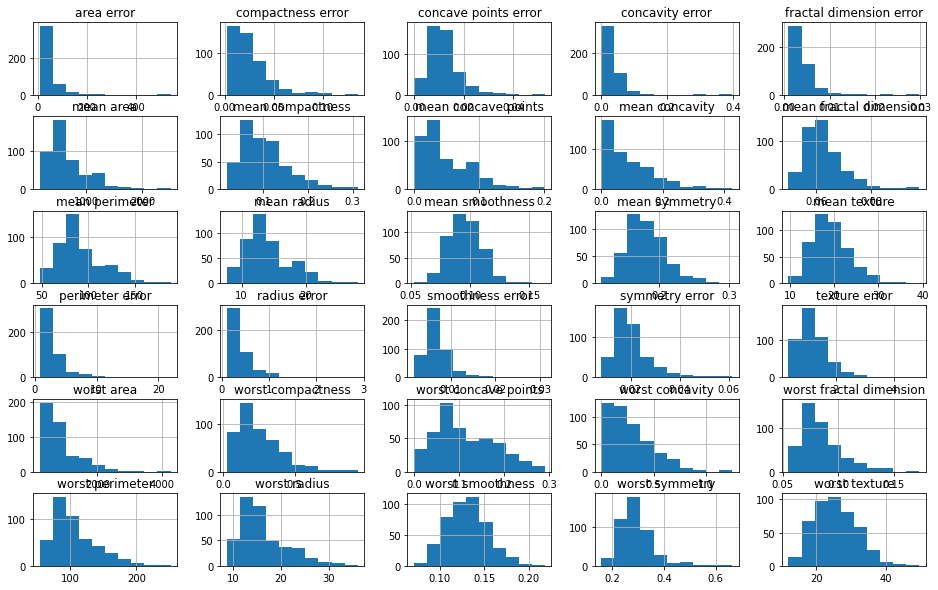

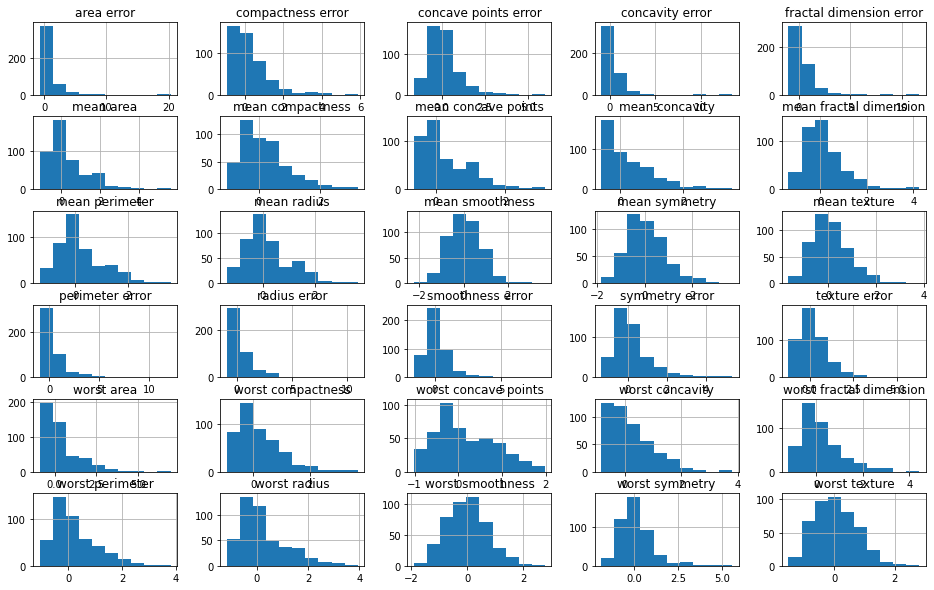

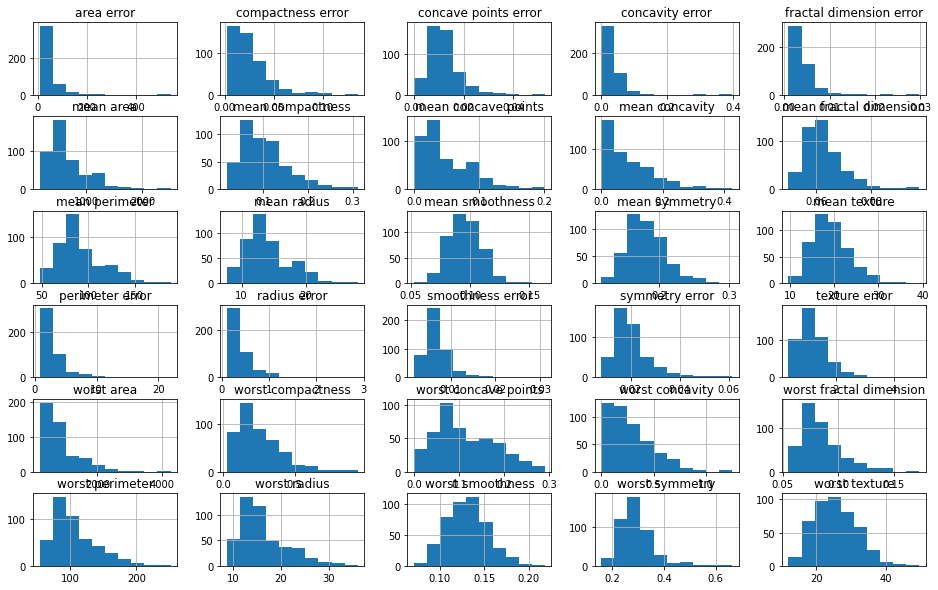

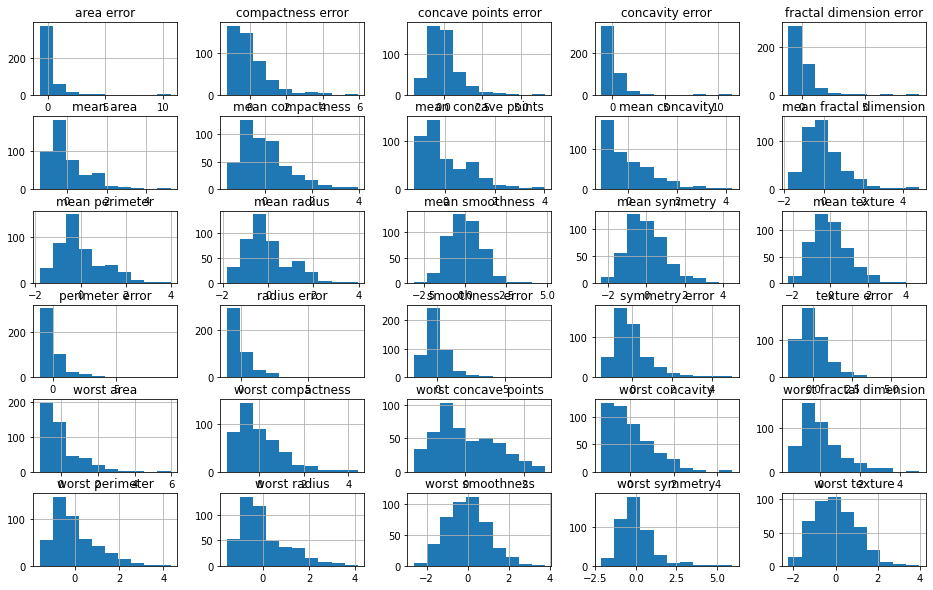

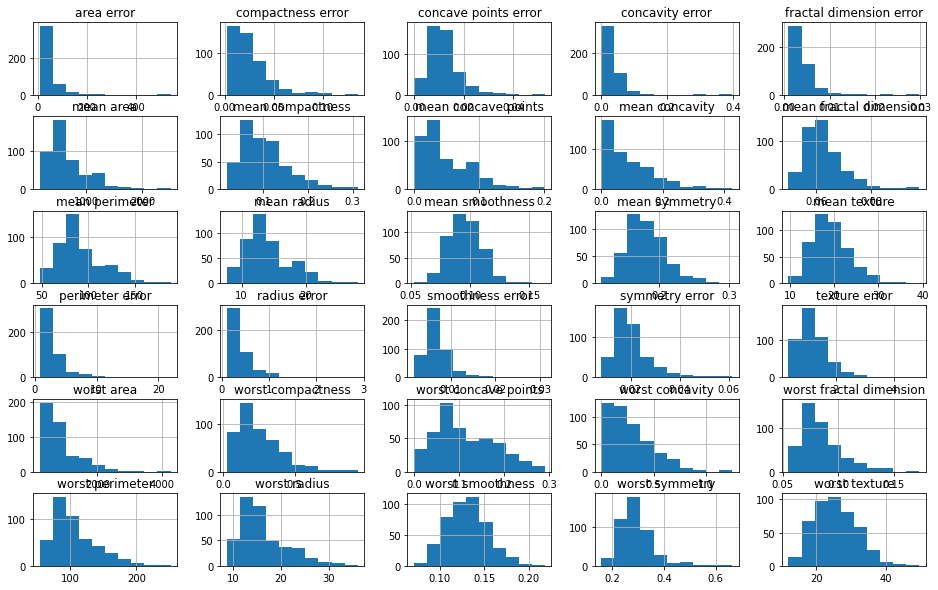

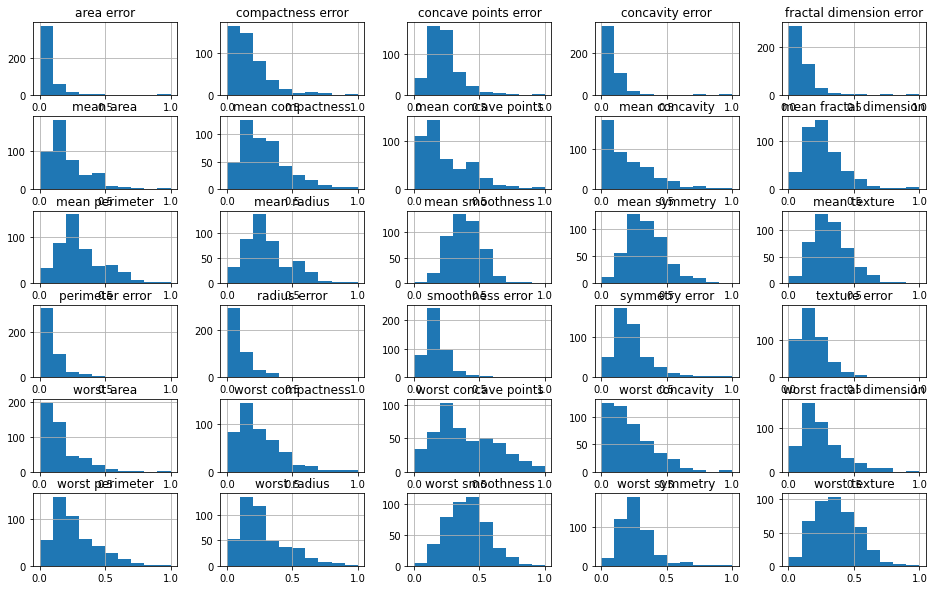

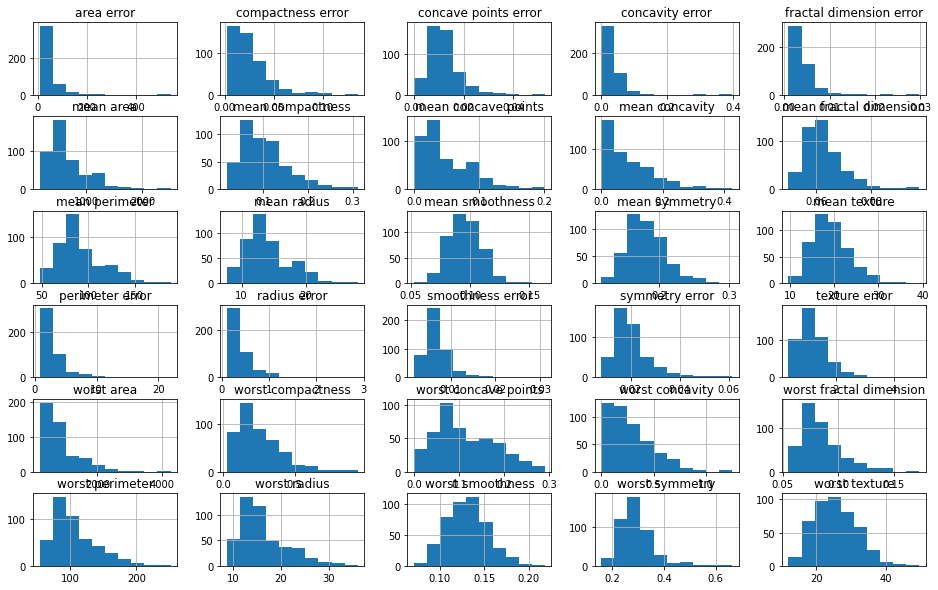

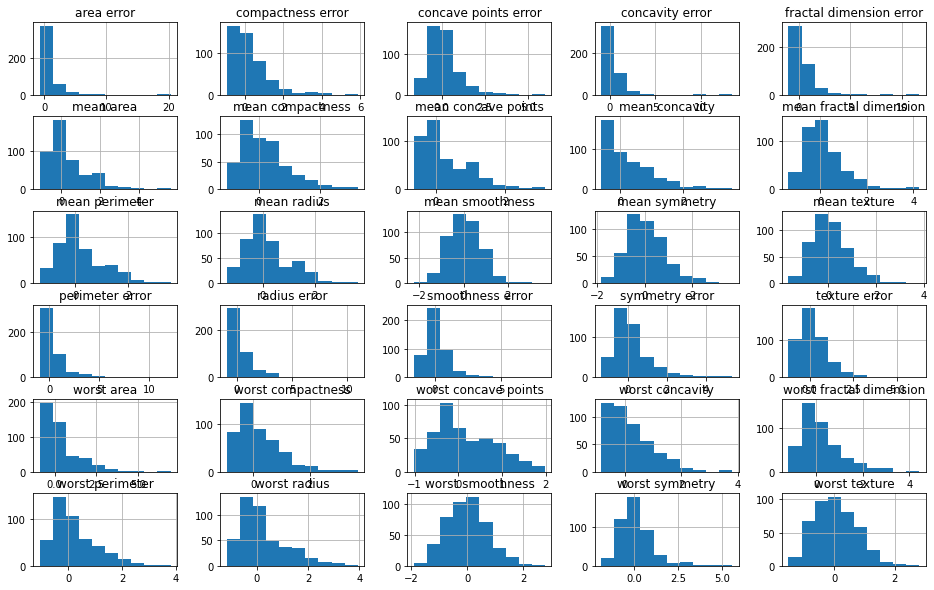

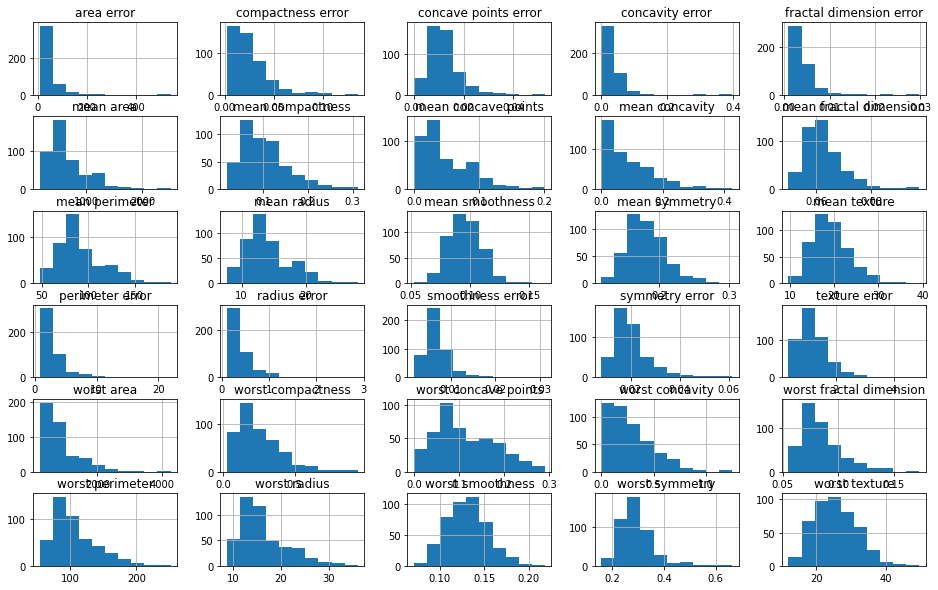

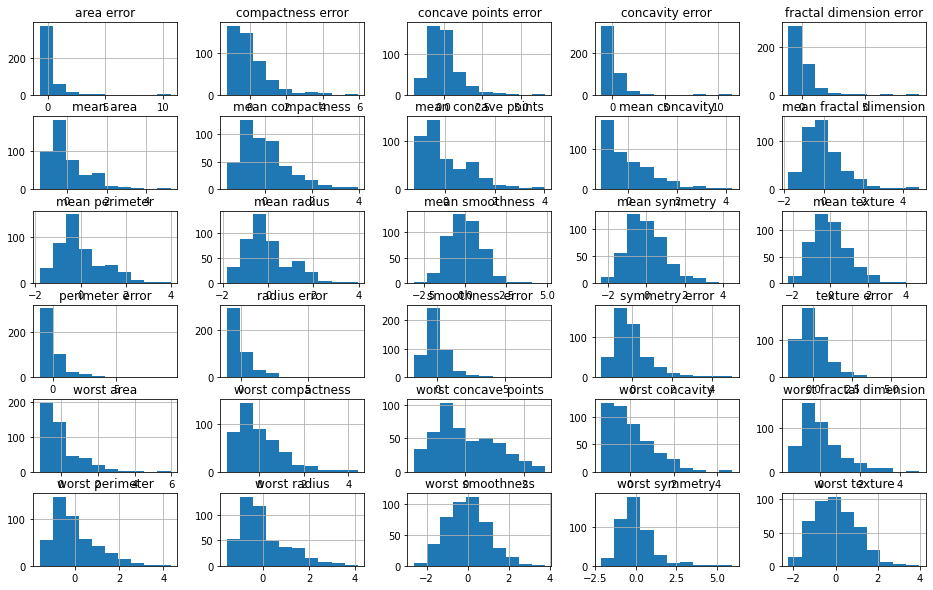

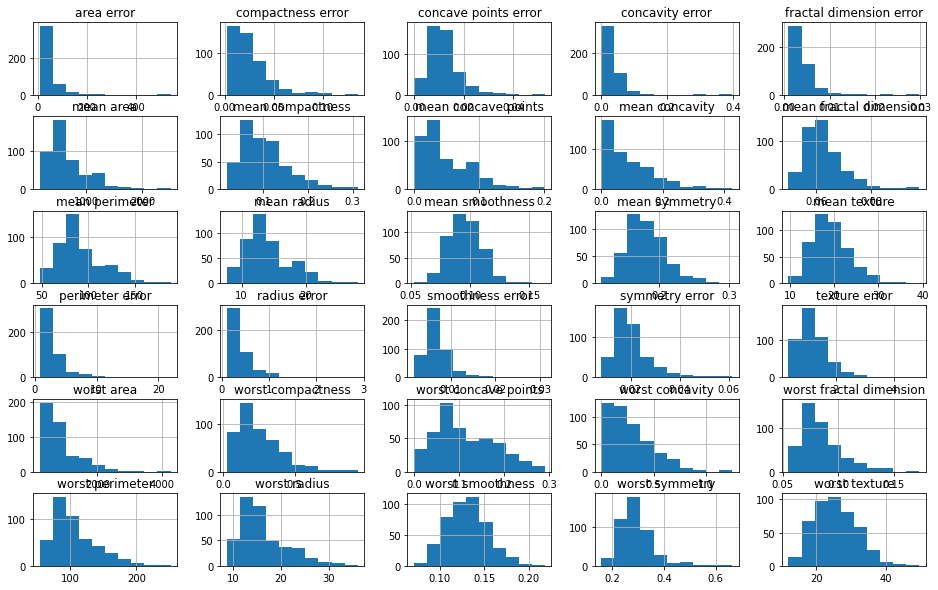

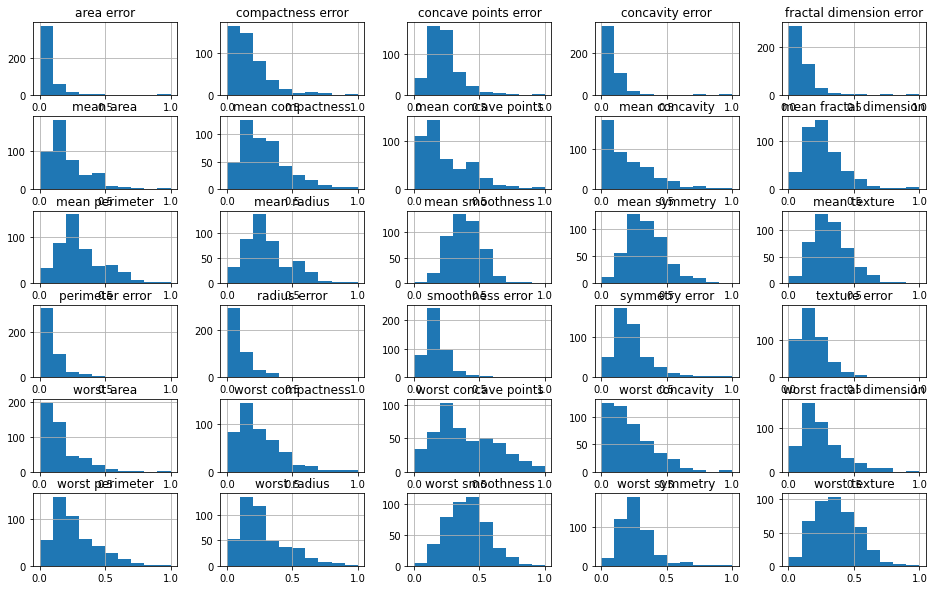

In [159]:
#-------- MAIN CODE ------

#--------LOADING DATASET------------
file_name = input("ENTER FILE PATH:")
data_set = load_dataset(file_name)
data_set.drop(data_set.columns[data_set.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
printing dataset
print(data_set.head())

#--------- DATASET SPLIT--------------
x = data_set.iloc[:,:-1]
y = data_set.iloc[:,-1]



d = load_breast_cancer()
#y = d.iloc[:,-1]
y = d['target']
#X = d.iloc[:,:-1]
x = pd.DataFrame(d['data'],columns = d['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(X_train)
print(y_train)
#---------PREPROCESSING----------------
data_list = []
num_imputed_mean = []
num_imputed_median = []


if len(data_set.select_dtypes(include = ['object']).get_dtype_counts()) == 0:
    data_list, num_imputed_mean, num_imputed_median = preprocessing_numerical_data(X_train, y_train)
else:
    print("")
    

print(data_list)
print(num_imputed_mean)
print(num_imputed_median)

models_normalized = [Logistic_Regression,Linear_SVC,]
models_without_norm = [Gradient_Boost,DecisionTree,Random_Forest]

result_norm = []
result_w_norm = []

# MODELS WITH NORMALIZATION
for i in tqdm(range(len(models_normalized))):
    result_norm.append(models_normalized[i](data_list, y_train, X_test, y_test))
    result_norm.append("***")
print(result_norm)

#MODELS WIHTOUT NORMALIZATION
for j in tqdm(range(len(models_without_norm))):    
    result_w_norm.append(models_without_norm[j](num_imputed_mean, num_imputed_median,y_train, X_test, y_test))
    result_w_norm.append("***")
print(result_w_norm)

#### EVALUATION

In [174]:
class Auto_ML:
    
    def __init__(self, scoring_function = 'balanced_accuracy', n_iter = 50):
        self.scoring_function = scoring_function
        self.n_iter = n_iter
        
    def fit(self,X,y):
        X_train = X
        y_train = y

        categorical_values = []

        cat_subset = X_train.select_dtypes(include = ['object','category','bool'])
        print("PRINTING....",cat_subset)

        for i in range(cat_subset.shape[1]):
            categorical_values.append(list(cat_subset.iloc[:,i].dropna().unique()))
        print("PRINTING....",categorical_values)
            
        num_pipeline = Pipeline([
        ('cleaner',SimpleImputer()),
        ('scaler',StandardScaler())])
        print("PRINTING...",num_pipeline)

        cat_pipeline = Pipeline([
        ('cleaner',SimpleImputer(strategy = 'most_frequent')),
        ('encoder',OneHotEncoder(sparse = False, categories=categorical_values))])


        preprocessor = ColumnTransformer([
        ('numerical', num_pipeline, make_column_selector(dtype_exclude=['object','category','bool'])),
        ('categorical', cat_pipeline, make_column_selector(dtype_include=['object','category','bool']))])
        
        
        
        model_pipeline_steps = []
        model_pipeline_steps.append(('preprocessor',preprocessor))
        model_pipeline_steps.append(('feature_selector',SelectKBest(f_classif,k='all')))
        model_pipeline_steps.append(('estimator',LogisticRegression()))
        model_pipeline = Pipeline(model_pipeline_steps)
    
        total_features = preprocessor.fit_transform(X_train).shape[1]
        optimization_grid = []
        
        # Logistic regression
        optimization_grid.append({
            'preprocessor__numerical__scaler':[RobustScaler(),StandardScaler(),MinMaxScaler()],
            'preprocessor__numerical__cleaner__strategy':['mean','median'],
            'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
            'estimator':[LogisticRegression()]
        })
        
                # K-nearest neighbors
        optimization_grid.append({
            'preprocessor__numerical__scaler':[RobustScaler(),StandardScaler(),MinMaxScaler()],
            'preprocessor__numerical__cleaner__strategy':['mean','median'],
            'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
            'estimator':[KNeighborsClassifier()],
            'estimator__weights':['uniform','distance'],
            'estimator__n_neighbors':np.arange(1,20,1)
        })

        # Random Forest
        optimization_grid.append({
            'preprocessor__numerical__scaler':[None],
            'preprocessor__numerical__cleaner__strategy':['mean','median'],
            'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
            'estimator':[RandomForestClassifier(random_state=0)],
            'estimator__n_estimators':np.arange(5,500,10),
            'estimator__criterion':['gini','entropy']
        })


        # Gradient boosting
        optimization_grid.append({
            'preprocessor__numerical__scaler':[None],
            'preprocessor__numerical__cleaner__strategy':['mean','median'],
            'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
            'estimator':[GradientBoostingClassifier(random_state=0)],
            'estimator__n_estimators':np.arange(5,500,10),
            'estimator__learning_rate':np.linspace(0.1,0.9,20),
        })



        # Decision tree
        optimization_grid.append({
            'preprocessor__numerical__scaler':[None],
            'preprocessor__numerical__cleaner__strategy':['mean','median'],
            'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
            'estimator':[DecisionTreeClassifier(random_state=0)],
            'estimator__criterion':['gini','entropy']
        })

        # Linear SVM
        optimization_grid.append({
            'preprocessor__numerical__scaler':[RobustScaler(),StandardScaler(),MinMaxScaler()],
            'preprocessor__numerical__cleaner__strategy':['mean','median'],
            'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
            'estimator':[LinearSVC(random_state = 0)],
            'estimator__C': np.arange(0.1,1,0.1),

        })
        
        
        search = RandomizedSearchCV(
                                    model_pipeline,
                                    optimization_grid,
                                    n_iter=self.n_iter,
                                    scoring = self.scoring_function, 
                                    n_jobs = -1, 
                                    random_state = 0, 
                                    verbose = 3,
                                    cv = 5)

        search.fit(X_train, y_train)
        self.best_estimator_ = search.best_estimator_
        self.best_pipeline = search.best_params_

    def predict(self,X,y = None):
        return self.best_estimator_.predict(X)

    def predict_proba(self,X,y = None):
        return self.best_estimator_.predict_proba(X)


# d = pd.read_csv('churn_1.csv')
# #y = d[]
p = load_breast_cancer()
#X = pd.DataFrame(d['data'],columns = d['feature_names'])
ALLOWED_EXTENSTIONS = ['csv','xls','json']

def load_dataset(file_name):
    if file_name:
        return file_name
    elif file_name.split('.',1)[1].lower() in ALLOWED_EXTENSTIONS[1]:
        return pd.read_excel(file_name)
    elif file_name.split('.',1)[1].lower() in ALLOWED_EXTENSTIONS[0]:
        return pd.read_csv(file_name)
    elif file_name.split('.',1)[1].lower() in ALLOWED_EXTENSTIONS[2]:
        return pd.read_json(file_name)
    
        


''' code start here'''        
d = load_dataset(input("Enter file path:"))
#d = input("Enter file path/name")
###
print(d)

#y = d.iloc[:,-1]
y = p['target']
#X = d.iloc[:,:-1]
X = pd.DataFrame(p['data'],columns = p['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = Auto_ML()
model.fit(X_train,y_train)

Enter file path:load_breast_cancer()
load_breast_cancer()
PRINTING.... Empty DataFrame
Columns: []
Index: [172, 407, 56, 497, 301, 550, 289, 277, 49, 234, 25, 398, 311, 539, 42, 374, 280, 218, 304, 346, 154, 126, 547, 553, 507, 174, 31, 113, 325, 173, 381, 319, 57, 495, 24, 17, 268, 66, 272, 494, 296, 490, 519, 513, 473, 480, 536, 94, 180, 336, 92, 23, 544, 357, 321, 278, 5, 116, 45, 220, 263, 348, 340, 16, 48, 548, 440, 3, 502, 335, 225, 26, 50, 229, 37, 157, 237, 543, 175, 450, 312, 194, 496, 67, 286, 168, 291, 463, 193, 152, 388, 302, 439, 299, 103, 420, 74, 423, 546, 119, ...]

[381 rows x 0 columns]
PRINTING.... []
PRINTING... Pipeline(steps=[('cleaner', SimpleImputer()), ('scaler', StandardScaler())])
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [175]:
print(balanced_accuracy_score(y_test, model.predict(X_test)))
print(model.best_pipeline)

0.9428271863821389
{'preprocessor__numerical__scaler': None, 'preprocessor__numerical__cleaner__strategy': 'mean', 'feature_selector__k': 21, 'estimator__n_estimators': 235, 'estimator__learning_rate': 0.5210526315789473, 'estimator': GradientBoostingClassifier(learning_rate=0.5210526315789473, n_estimators=235,
                           random_state=0)}


In [176]:
# change file pathe to save the models 
from keras.models import load_model
#model.save("C:/Users/Praty/OneDrive/Desktop/model_Disease.h5")
filename = 'C:/Users/Praty/OneDrive/Desktop/model_disease_lr.pckl' 
print("The file is saved as a Pickle dump file")
pickle.dump(model, open(filename, 'wb'))

The file is saved as a Pickle dump file


In [23]:
# def fit(data_set):
#     # checking if all attributes are numerical or  mix
#     # check dtypes
#     # check for nan or missing values
#     # replace with median or mode
#     # selecting best features [using pca, feature importance, ]
#     # normalization by different methods [using robust scaler, min_max scaler, standarderd scaler and checking which is best]
#     #dfName.select_dtypes(include=['object']).columns.tolist()
    
#     ''' starting the code now'''
    
#     # segregating the columns with object numerical and categorical values
#     if len(data_set.select_dtypes(include=['object'])) != 0:
#         obj = data_set.select_dtypes(include=['object'].copy())
#         num = data_set.select_dtypes(include=['number'].copy())
        
#         # checking for missing values and imputing them
#         if obj.isnull().values.sum() == 0:
#             obj_imputed = obj.apply(lambda x: x.fillna(x.value_counts().index[0])) 
            
#             #one hot encoding
#             col_name = obj_imputed.columns
            
#             for i in range(0,len(col_name)):
#                 obj_one_hot = pd.get_dummies(obj_imputed, columns = col_name[i], prefix= col_name[i]) 
#         else:
#             obj_imputed = obj
#             # one hot encoding
        
#         if num.isnull().values.sum() != 0:
#             num_imputed = num.apply(lambda x: x.fillna(x.median().index[0]))
            
            
#         else:
#             num_imputed = num
            
#         # feature selection
#         # normalization
       
            

#     else:
#         num = data_set
#         if num.isnull().values.sum() != 0:
#             num_imputed_median = num.apply(lambda x: x.fillna(x.median().index[0]))
#             num_imputed_mean = num.apply(lambda x: x.fillna(x.mean().index[0]))
#         else:
#             num_imputed_median, num_imputed_mean = num
#             return num_imputed_median, num_imputed_mean
#         # feature selection
#         # normalization
        
# fit(pd.read_csv('filtered_framingham.csv'))

In [17]:
# # 
# df = pd.read_csv('churn_1.csv')
# print(df.select_dtypes(include=['number']).columns.tolist())
# print(df.dtypes)
# num = df.select_dtypes(include=['number'].copy())
# num_imputed_median = num.apply(lambda x: x.fillna(x.median()))
# num_imputed_mean = num.apply(lambda x: x.fillna(x.mean()))

['SeniorCitizen', 'tenure', 'MonthlyCharges']
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
      SeniorCitizen  tenure  MonthlyCharges
0                 0       1           29.85
1                 0      34           56.95
2                 0       2           53.85
3                 0      45           42.30
4                 0       2           70.70
...             ...     ...             ...
7038              0      24           84.80


In [ ]:
# col_name = obj_imputed.columns
#             for i in range(len(col_name)):
#                 obj_one_hot = pd.get_dummies(obj_one_hot, columns = col_name[i], prefix= col_name[i]) 